## Logistic Regression Project 

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

**Complete the TASKs written in bold below.**

## Imports

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [137]:
df = pd.read_csv('heart.csv')

In [138]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [139]:
df['target'].unique()

array([1, 0], dtype=int64)

### Exploratory Data Analysis and Visualization


**TASK: Explore if the dataset has any missing data points and create a statistical summary of the numerical features as shown below.**

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [141]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Visualization Tasks

**TASK: Create a bar plot that shows the total counts per target value.**

<AxesSubplot:xlabel='target', ylabel='count'>

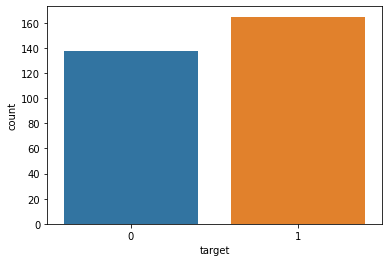

In [142]:
sns.countplot(df['target'])

**TASK: Create a pairplot that displays the relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']
   
*Note: Running a pairplot on everything can take a very long time due to the number of features*

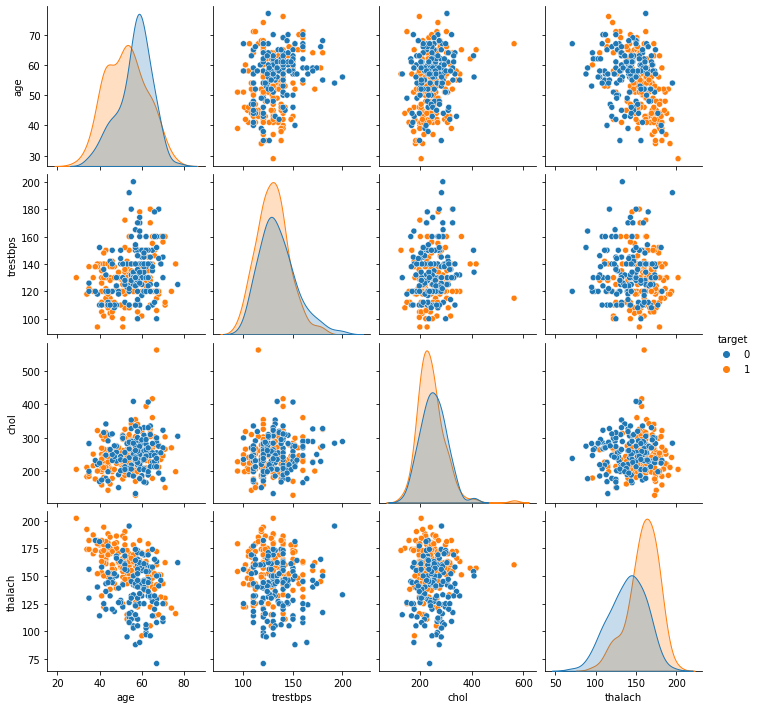

In [143]:
sns.pairplot(data=df[['age','trestbps', 'chol','thalach','target']], hue='target')

**TASK: Create a heatmap that displays the correlation between all the columns.**

<AxesSubplot:>

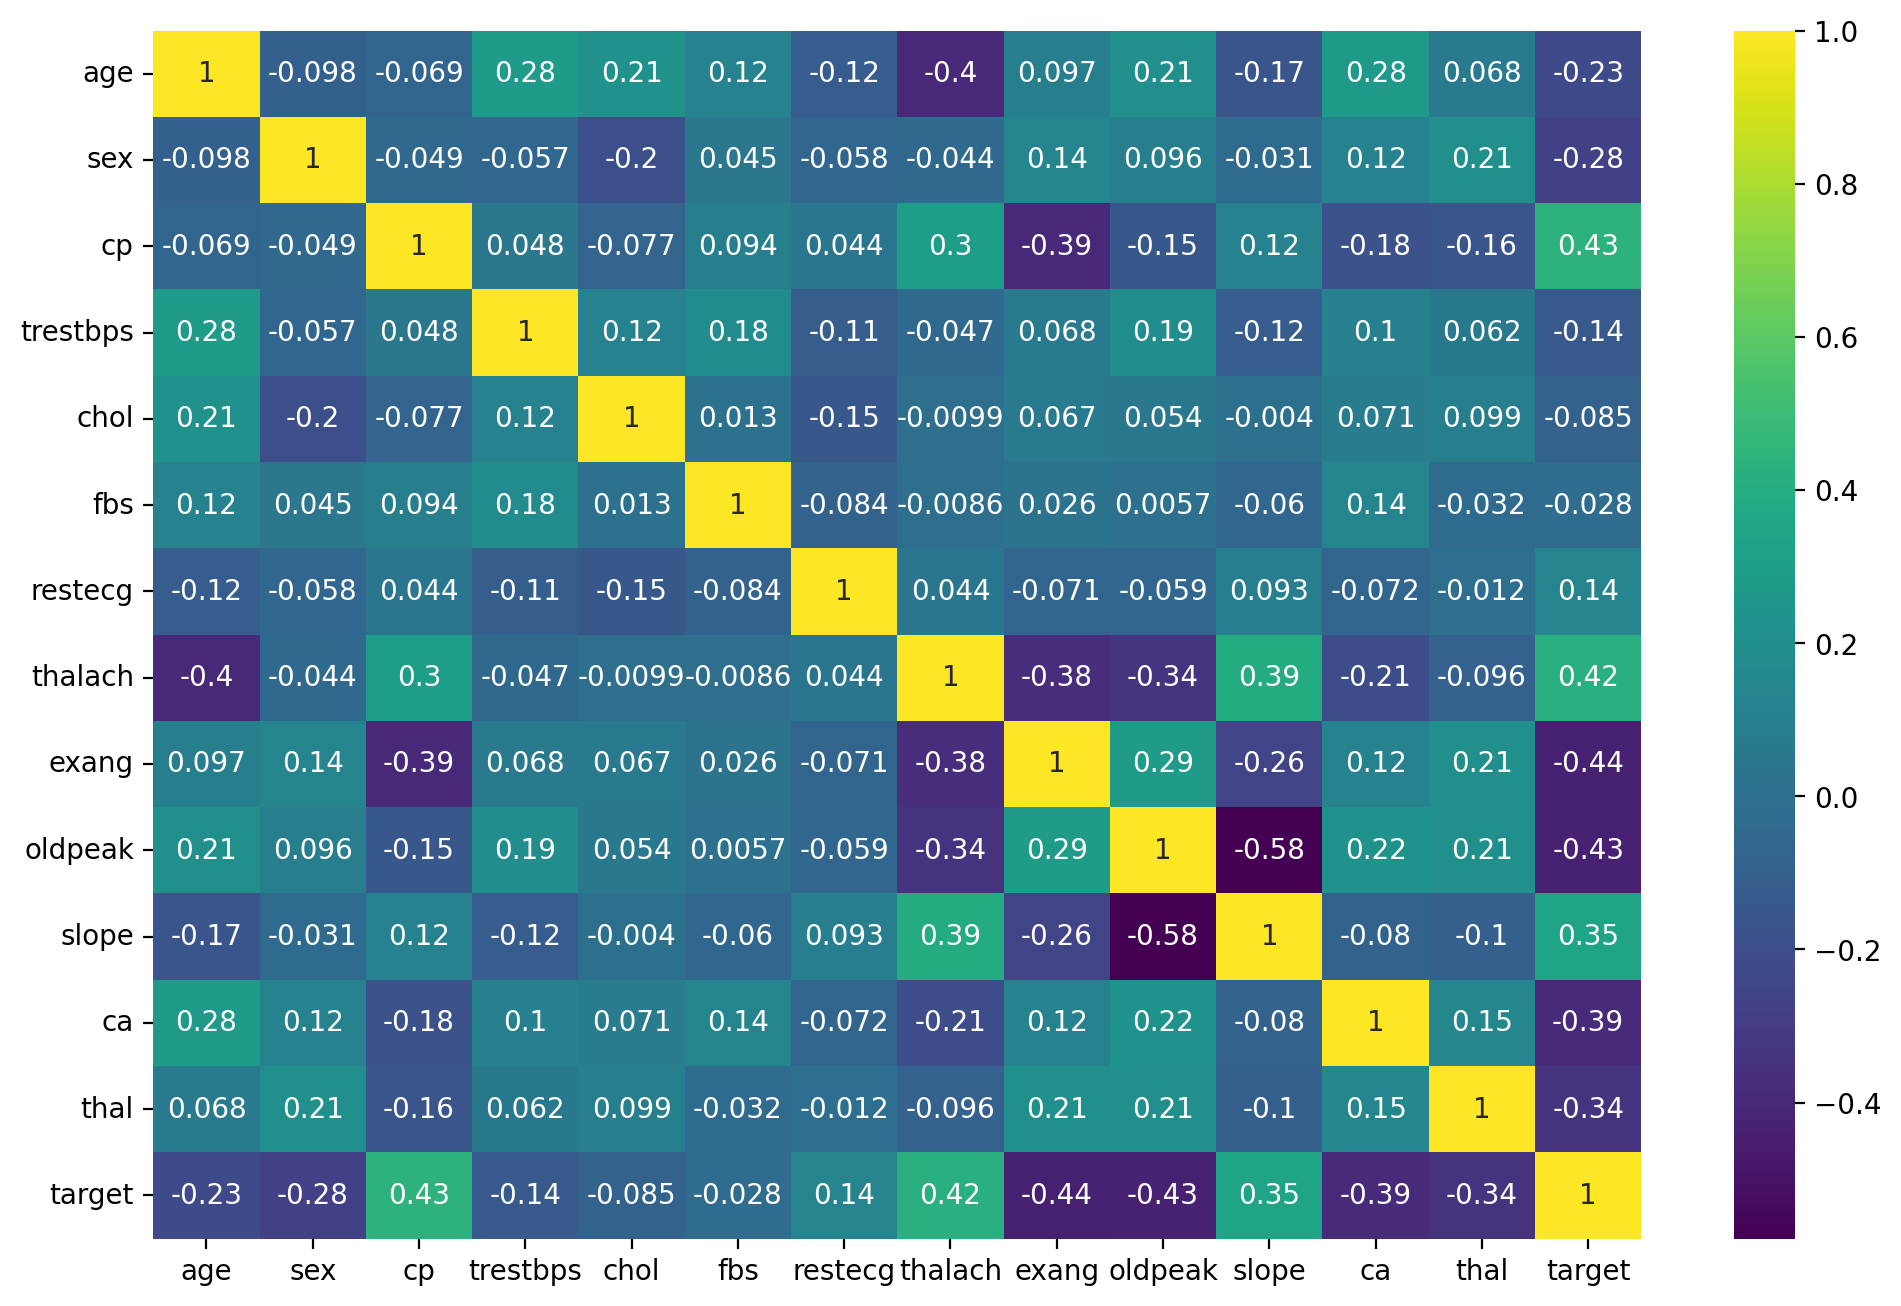

In [144]:
fig, ax = plt.subplots(figsize=(12,8), dpi=200)
sns.heatmap(df.corr(), ax=ax, annot= True, cmap='viridis')

----
----

# Machine Learning

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [145]:
X= df.drop('target', axis = 1)
y= df['target']

**TASK: Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [148]:
from sklearn.preprocessing import StandardScaler

In [149]:
scalar= StandardScaler()

In [150]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

### Logistic Regression Model

**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

In [151]:
from sklearn.linear_model import LogisticRegression

In [152]:
logistic_model = LogisticRegression(solver='saga', max_iter=5000,multi_class='ovr')

In [153]:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'], 'l1_ratio': np.linspace(0,1,10), 'C': np.logspace(0,10,20)}

In [154]:
from sklearn.model_selection import GridSearchCV

In [155]:
grid_model = GridSearchCV(estimator=logistic_model, param_grid=param_grid)

In [156]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [157]:
y_predict = grid_model.predict(X_test)

In [158]:
grid_model.best_estimator_

LogisticRegression(l1_ratio=0.0, max_iter=5000, multi_class='ovr', penalty='l1',
                   solver='saga')

In [159]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1'}

### Using LogisticRegressionCV

In [160]:
from sklearn.linear_model import LogisticRegressionCV

In [161]:
log_CV_model = LogisticRegressionCV(Cs=np.logspace(0,10,20), cv=5)

In [162]:
log_CV_model.fit(X_train, y_train)

LogisticRegressionCV(Cs=array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                     cv=5)

In [163]:
y_cv_predict = log_CV_model.predict(X_test)

In [164]:
log_CV_model.C_

array([3.35981829])

**TASK: Report back your search's optimal parameters, specifically the C value.** 

*Note: You may get a different value than what is shown here depending on how you conducted your search.*

In [165]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [166]:
log_CV_model.C_

array([3.35981829])

### Coeffecients

**TASK: Report back the model's coefficients.**

In [177]:
log_CV_model.coef_

array([[-0.06831728, -0.77009128,  0.92713474, -0.27554899, -0.22822428,
         0.04691131,  0.12347208,  0.44786112, -0.43479735, -0.53987791,
         0.39592665, -0.88436344, -0.59145063]])

### TASK: Create a visualization of the coefficients by using a barplot of their values.

In [186]:
z = pd.Series(index=X.columns, data=log_CV_model.coef_[0])

In [190]:
z.sort_values(inplace=True)
z

ca         -0.884363
sex        -0.770091
thal       -0.591451
oldpeak    -0.539878
exang      -0.434797
trestbps   -0.275549
chol       -0.228224
age        -0.068317
fbs         0.046911
restecg     0.123472
slope       0.395927
thalach     0.447861
cp          0.927135
dtype: float64

<AxesSubplot:>

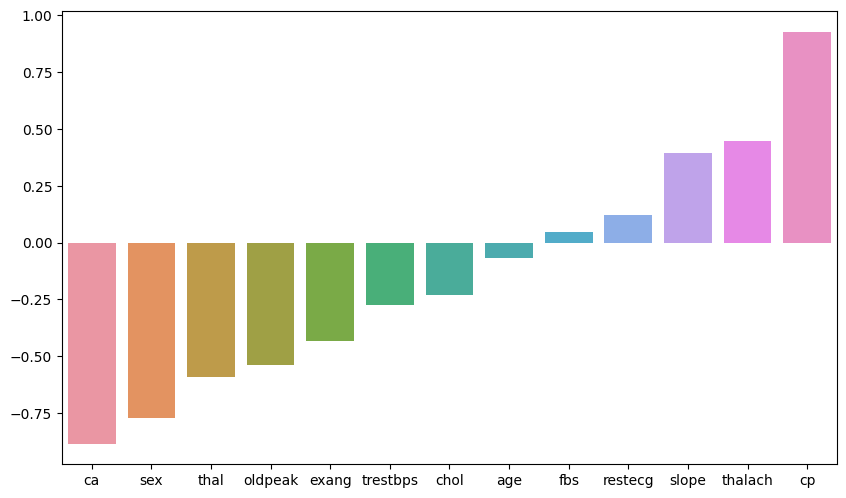

In [195]:
figm,ax = plt.subplots(figsize = (10,6), dpi=100)
sns.barplot(x=z.index, y=z.values)

---------

## Model Performance Evaluation

**TASK: Let's now evaluate your model on the remaining 10% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [196]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [199]:
accuracy_score(y_test, y_predict)

0.8387096774193549

In [197]:
confusion_matrix(y_test, y_cv_predict)

array([[12,  3],
       [ 2, 14]], dtype=int64)

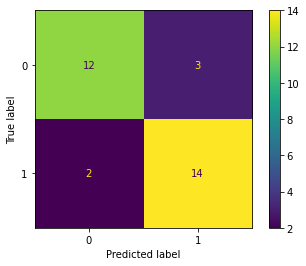

In [198]:
plot_confusion_matrix(estimator=log_CV_model, X=X_test, y_true=y_test)

In [200]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Performance Curves

**TASK: Create both the precision recall curve and the ROC Curve.**

In [201]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

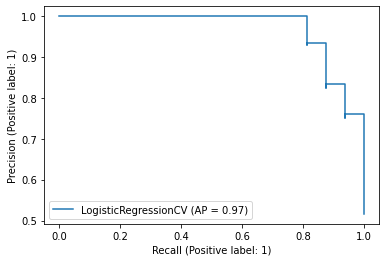

In [203]:
plot_precision_recall_curve(estimator=log_CV_model, X=X_test, y=y_test)

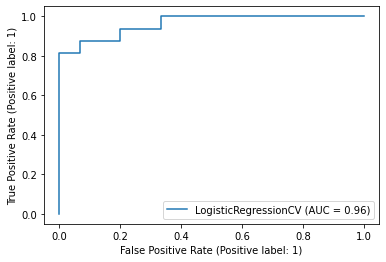

In [204]:
plot_roc_curve(estimator=log_CV_model, X=X_test, y=y_test)

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**TASK: What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

*For convience, we created an array of the features for the patient above*

In [173]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [205]:
log_CV_model.predict(patient)

array([0], dtype=int64)

In [206]:
log_CV_model.predict_proba(patient)

array([[1.00000000e+00, 5.07311618e-25]])

100% probablity this patent belongs to 0 class